In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ETH_1h.csv to ETH_1h.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['ETH_1h.csv']))
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df.loc[0,'Date']

'2020-03-13 08-PM'

In [ ]:
df.loc[0,'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-9-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DateParseError: Unknown datetime string format, unable to parse: 2020-03-13 08-PM, at position 0

In [ ]:
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')

In [ ]:
df['Date']

,Date
0,2020-03-13 20:00:00
1,2020-03-13 19:00:00
2,2020-03-13 18:00:00
3,2020-03-13 17:00:00
4,2020-03-13 16:00:00
...,...
23669,2017-07-01 15:00:00
23670,2017-07-01 14:00:00
23671,2017-07-01 13:00:00
23672,2017-07-01 12:00:00


In [ ]:
df.loc[0,'Date'].day_name()

'Friday'

In [ ]:
from datetime import datetime
d_parser=lambda x:datetime.strptime(x,'%Y-%m-%d %I-%p')
df = pd.read_csv(io.BytesIO(uploaded['ETH_1h.csv']),parse_dates=['Date'],date_parser=d_parser)
df.head()
# df1 = pd.read_csv(io.BytesIO(uploaded['ETH_1h.csv']),parse_dates=['Date'],date_parser=d_parser)
# df1.head()

<ipython-input-41-5f79b1141933>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(io.BytesIO(uploaded['ETH_1h.csv']),parse_dates=['Date'],date_parser=d_parser)


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df.loc[0,'Date'].day_name()

'Friday'

In [ ]:
df['Date'].dt.day_name()

,Date
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday
...,...
23669,Saturday
23670,Saturday
23671,Saturday
23672,Saturday


In [ ]:
df['Dayofweek'] = df['Date'].dt.day_name()

In [ ]:
df

,Date,Symbol,Open,High,Low,Close,Volume,Dayofweek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [ ]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [ ]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [ ]:
#time delta

df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [ ]:
#filter by date

filt = (df['Date'] >= '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,Dayofweek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [ ]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,Dayofweek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [ ]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,Dayofweek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,Dayofweek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [ ]:
df.loc['2019']['Close'].mean()

180.7520296803653

In [ ]:
df.loc['2020-01-01']['High'].max()

132.68

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [ ]:
%matplotlib inline

<Axes: xlabel='Date'>

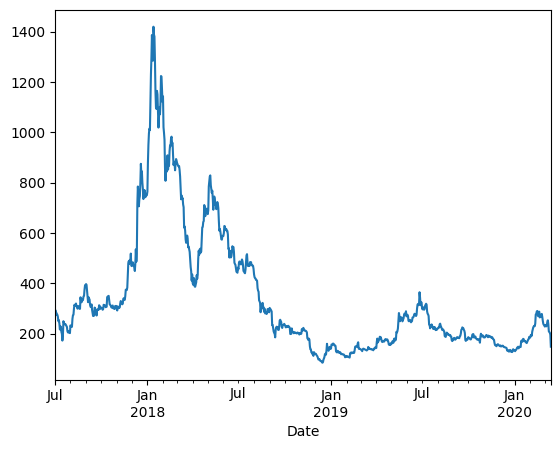

In [ ]:
highs.plot()

In [ ]:
#resample by week
df.resample('W').agg({'Close':'mean'})

,Close
Date,
2017-07-02,268.202162
2017-07-09,261.062083
2017-07-16,195.698393
2017-07-23,212.783750
2017-07-30,203.309524
...,...
2020-02-16,255.198452
2020-02-23,265.321905
2020-03-01,236.373988


In [ ]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randn
%matplotlib inline

# Create Dataframe
my_df = pd.DataFrame(randn(25,4), columns=["Mon", "Tues", "Wed", "Thurs"])
my_df

,Mon,Tues,Wed,Thurs
0,0.806940,-0.801676,1.123678,0.764051
1,-1.272132,1.232586,-1.155868,-0.117952
2,-1.326260,-0.765154,0.328728,-0.864821
3,1.716580,-0.167237,2.628297,-2.598361
4,0.354568,-0.359494,-2.197612,-0.495901
5,1.444799,-0.034904,-2.392246,-0.887403
6,0.788393,0.458260,-1.124921,0.467603
7,-0.312214,0.478022,0.485872,0.058789
8,1.200657,0.022273,0.524739,-0.497708
9,-0.782243,1.005489,-0.062209,-0.933240


<Axes: >

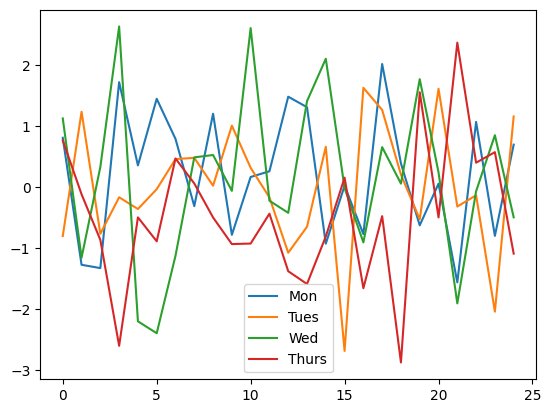

In [ ]:
# Line plot
my_df.plot(kind="line")

<Axes: >

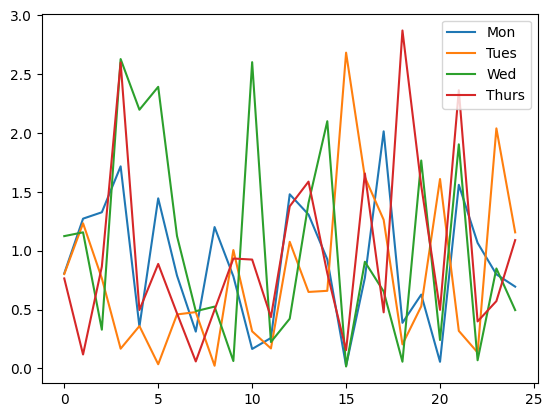

In [ ]:
# line plot absolute
my_df.abs().plot(kind="line")

<Axes: >

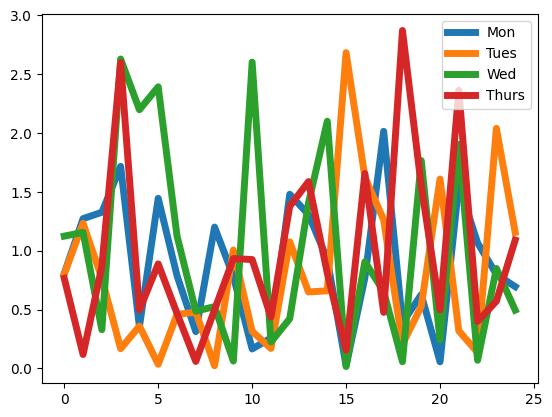

In [ ]:
# line Width
my_df.abs().plot(kind="line", lw=5)

<Axes: >

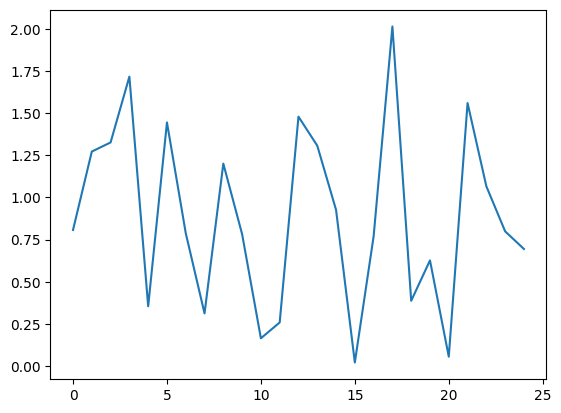

In [ ]:
# Line single
my_df['Mon'].abs().plot(kind="line")

<Axes: >

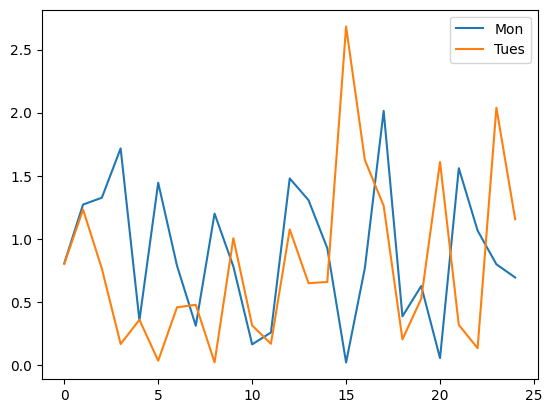

In [ ]:
# Line More than one
my_df[['Mon', 'Tues']].abs().plot(kind="line")

<Axes: >

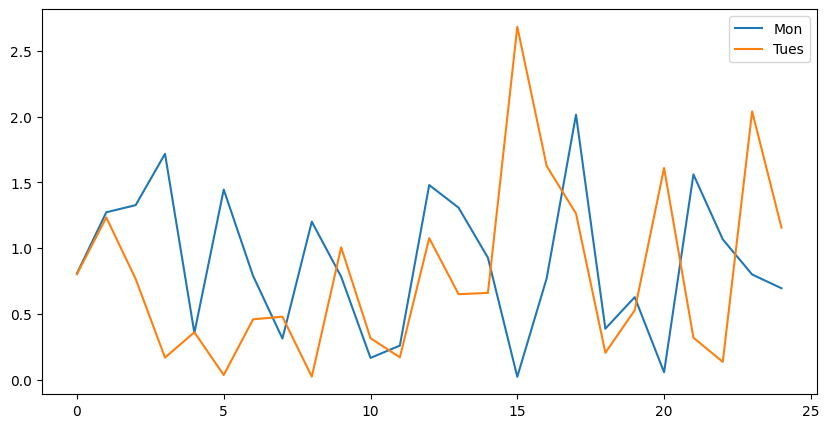

In [ ]:
# Size
my_df[['Mon', 'Tues']].abs().plot(kind="line", figsize=(10,5))

<Axes: title={'center': 'Line Chart'}>

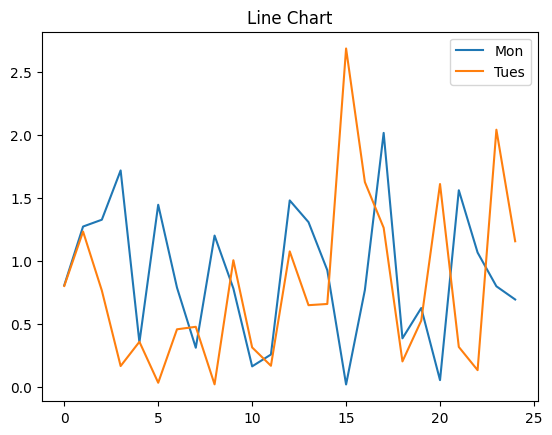

In [ ]:
# Title
my_df[['Mon', 'Tues']].abs().plot(kind="line", title="Line Chart")

<Axes: >

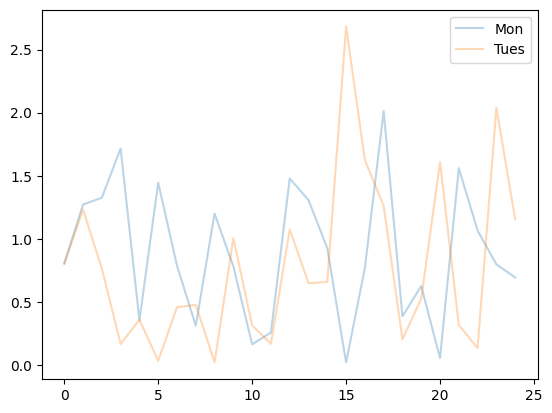

In [ ]:
# Shading
my_df[['Mon', 'Tues']].abs().plot(kind="line", alpha=0.3)

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randn
%matplotlib inline

# Create Dataframe
my_df = pd.DataFrame(randn(500,4), columns=["Mon", "Tues", "Wed", "Thurs"])
my_df

,Mon,Tues,Wed,Thurs
0,0.310000,0.436562,0.334248,0.715325
1,0.525956,-0.271324,0.129819,0.212180
2,-0.195308,-0.401856,1.063405,0.224308
3,-0.332113,-0.757477,0.379195,-0.228336
4,-0.160612,0.695538,-0.060944,-0.285224
...,...,...,...,...
495,0.232669,-1.308678,0.373720,0.027243
496,-0.965461,0.489513,0.112105,0.297990
497,-0.718958,0.150115,0.532140,1.598726
498,-1.437325,0.050076,-1.189002,0.323596


<Axes: xlabel='Mon', ylabel='Tues'>

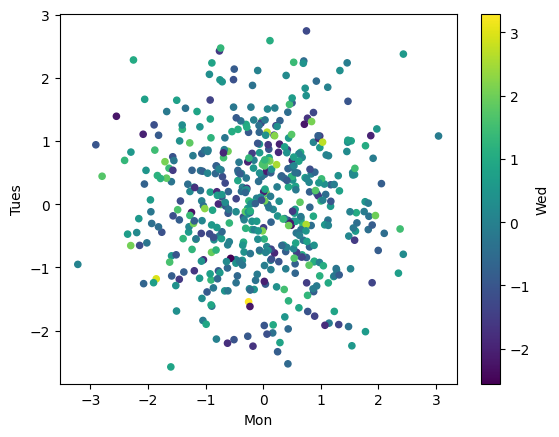

In [ ]:
# Scatter plot
my_df.plot(kind="scatter", x="Mon", y="Tues", c="Wed")

<Axes: xlabel='Mon', ylabel='Tues'>

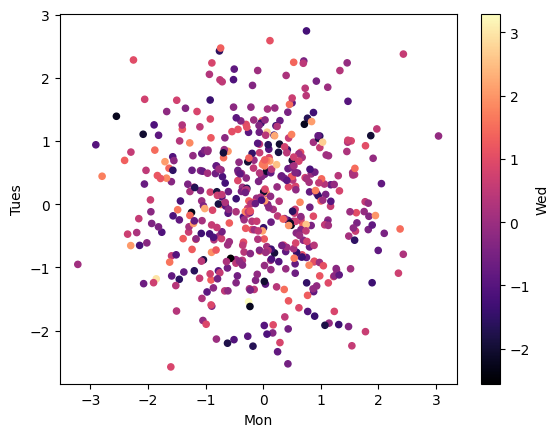

In [ ]:
# Colors: https://matplotlib.org/stable/tutorials/colors/colormaps.html
my_df.plot(kind="scatter", x="Mon", y="Tues", c="Wed", cmap='magma')

<Axes: xlabel='Mon', ylabel='Tues'>

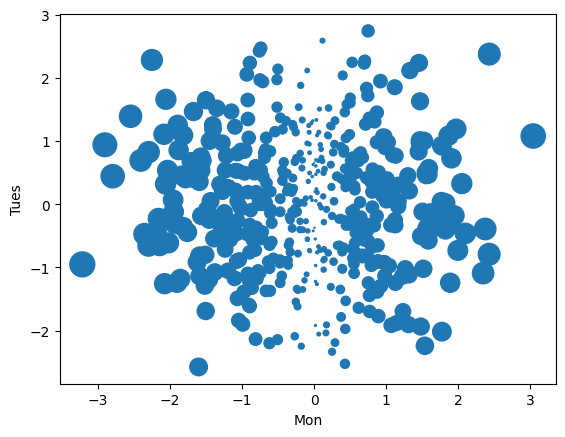

In [ ]:
# By Size
my_df.plot(kind="scatter", x="Mon", y="Tues", s=abs(my_df['Mon']*100))

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: xlabel='Mon', ylabel='Tues'>

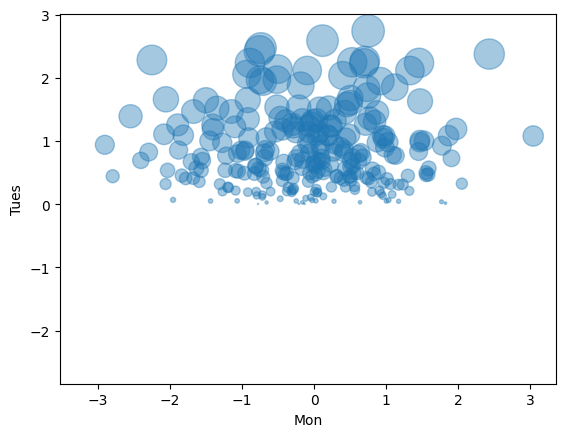

In [ ]:
# By Size easier to read with Alpha
my_df.plot(kind="scatter", x="Mon", y="Tues", s=my_df['Tues']*200, alpha=0.4)

<Axes: >

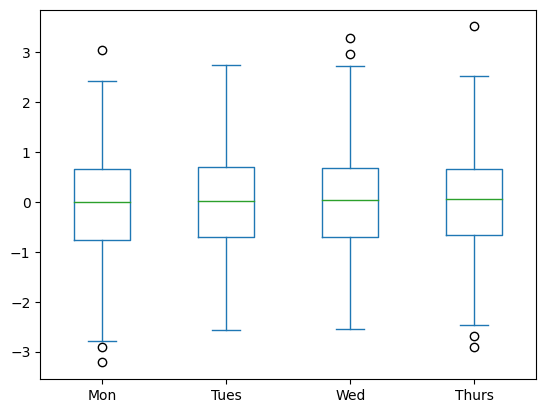

In [ ]:
# Boxplots
my_df.plot(kind="box")

<Axes: >

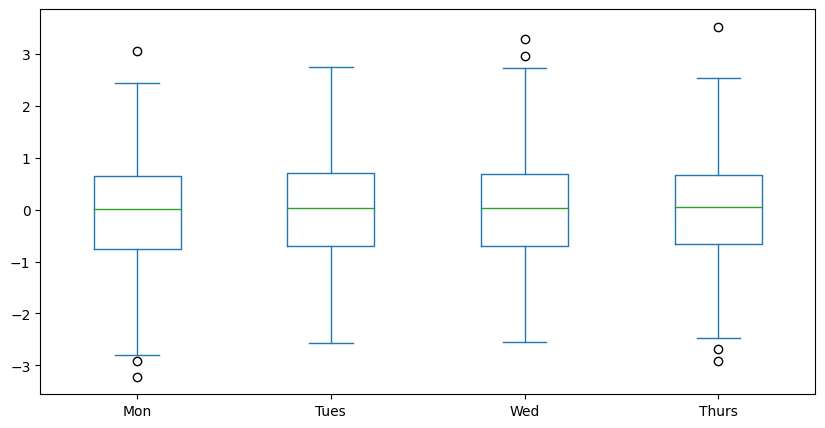

In [ ]:
# Boxplots Size
my_df.plot(kind="box", figsize=(10, 5))

<Axes: >

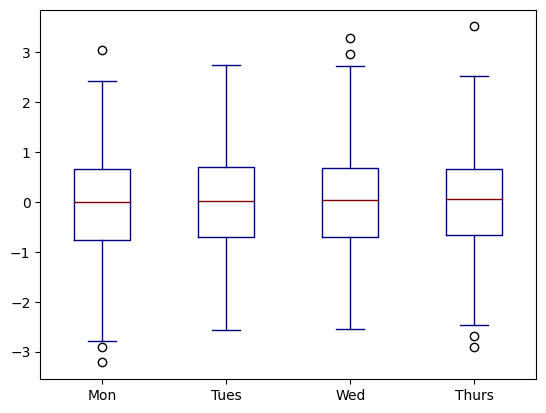

In [ ]:
# Boxplots Color
my_df.plot(kind="box", cmap="jet")

TypeError: Axes.boxplot() got an unexpected keyword argument 'lengend'

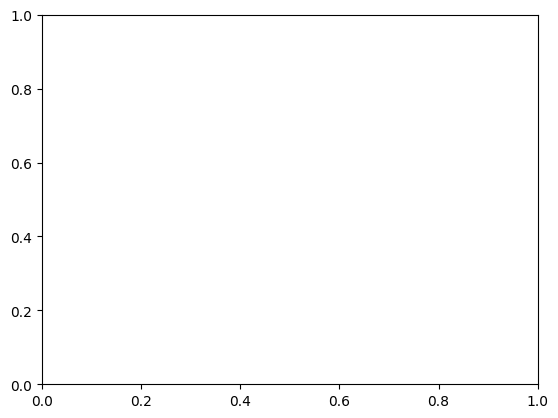

In [ ]:
# No Legend
my_df.plot(kind="box", lengend=True)

<Axes: title={'center': 'My Awesome Box Plot!'}>

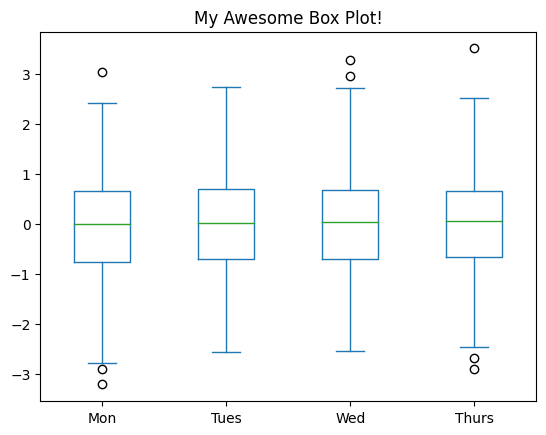

In [ ]:
# Title
my_df.plot(kind="box", title="My Awesome Box Plot!")

<Axes: title={'center': 'My Awesome Box Plot!!!!!!!!'}>

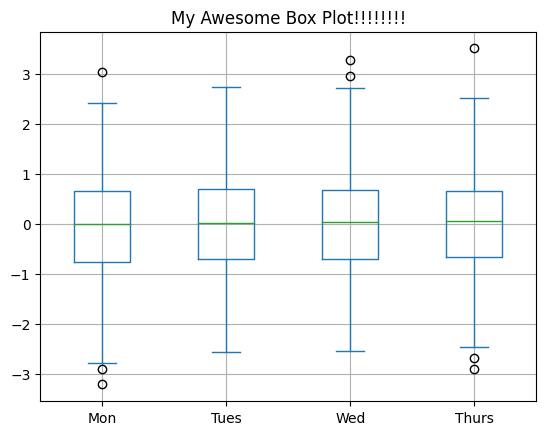

In [ ]:
# Add Grid
my_df.plot.box(title="My Awesome Box Plot!!!!!!!!", grid=True)

<Axes: xlabel='Mon', ylabel='Tues'>

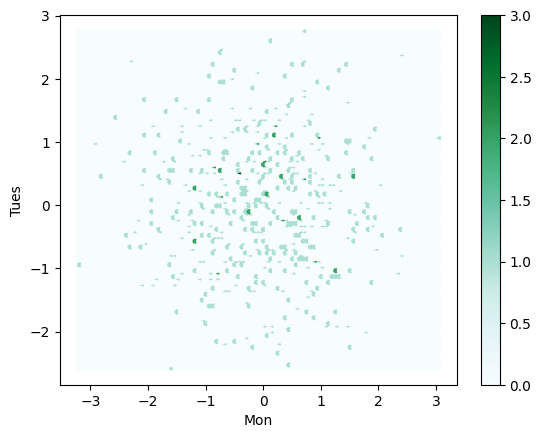

In [ ]:
# Hexplots
my_df.plot(kind="hexbin", x="Mon", y="Tues")

<Axes: xlabel='Mon', ylabel='Tues'>

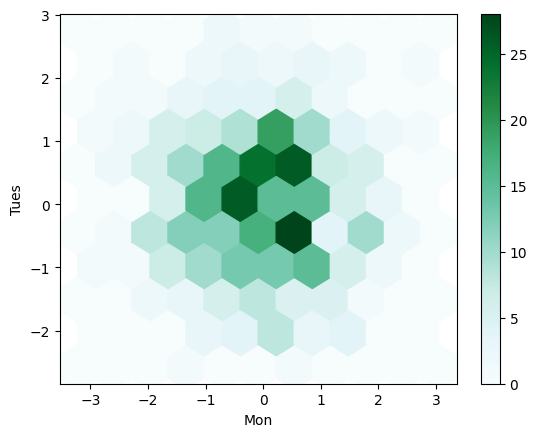

In [ ]:
# Hexplots gridsize
my_df.plot(kind="hexbin", x="Mon", y="Tues", gridsize=10)

<Axes: title={'center': 'My Awesome Hex Plot'}, xlabel='Mon', ylabel='Tues'>

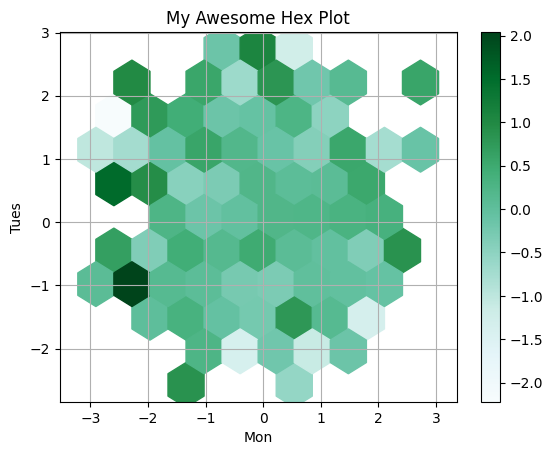

In [ ]:
# Grid
my_df.plot.hexbin(x="Mon", y="Tues", C="Wed", gridsize=10, title="My Awesome Hex Plot", grid=True)

<Axes: ylabel='Density'>

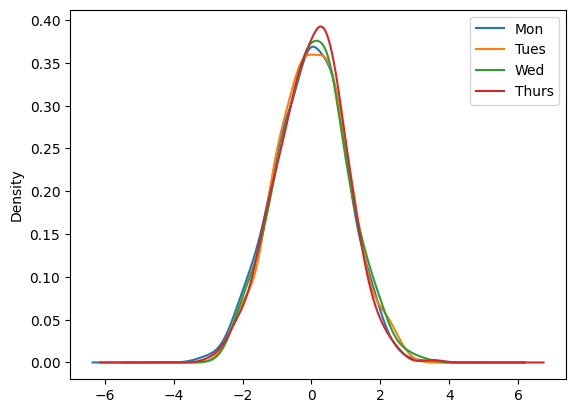

In [ ]:
# Density and kernel density estimation plots with scipy
my_df.plot(kind="kde")

<Axes: ylabel='Density'>

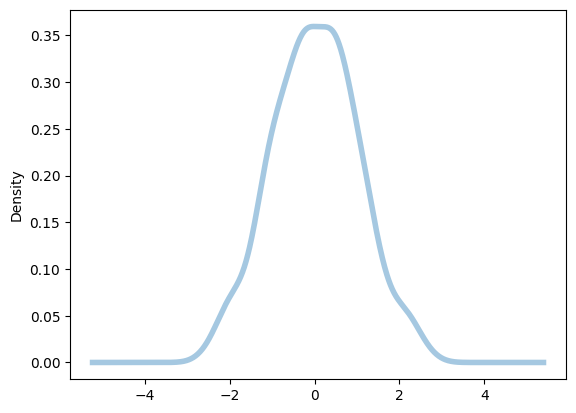

In [ ]:
my_df["Tues"].plot.kde(alpha=0.4, lw=4)

<Axes: ylabel='Density'>

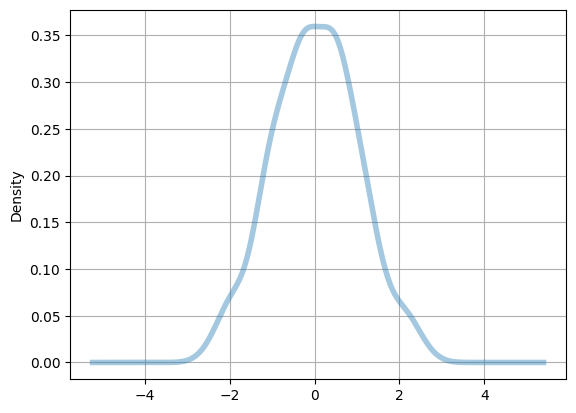

In [ ]:
# Grid
my_df["Tues"].plot.kde(alpha=0.4, lw=4, grid=True)